# Analytical Computing — Inleveropdrachten Calculus

De inleveropdracht bestaat uit vier onderdelen, waarvan de laatste twee in deze Jupyter Notebook zitten. Per week lever je een deel in, waarop je vervolgens feedback krijgt. Je kan deze feedback gebruiken om je werk te verbeteren, aan het einde van het blok wordt deze Notebook als portfolio beoordeeld voor je uiteindelijke cijfer.

Iedere weekopdracht is verdeeld in een aantal deelopdrachten, waarbij je doorgaans iets moet programmeren om de geleerde wiskunde toe te passen. Daarnaast zijn er formatieve oefen-opdrachten waarbij je iets met de hand uit werkt, deze zijn in een ander notebook te vinden en kijken zichzelf na. Bij de code-opdrachten zal in de meeste gevallen aan het einde een test staan waarmee je kan zien of je code doet wat het moet doen. Iedere weekopdracht wordt afgesloten met een checkpoint, waar alle testen nog een keer herhaald worden. Als dit allemaal goed gaat kun je je werk op Canvas inleveren door een link naar je repository bij de juiste weekopdracht in te leveren. 

Voor je begint: voer het eerste code-blok uit voor alle imports.

## Gebruik
In Jupyter kan je code per cel uitvoeren. Deze cel is een tekstcel, als je deze uitvoert gebeurt er in principe niets. Je kunt wel dubbelklikken op de cell om de tekst aan te kunnen passen (dit zul je moeten doen bij de opdrachten waarbij je geen code maar tekst/formules moet schrijven). Als je de cel vervolgens uitvoert komt deze er weer als opgemaakte tekst uit te zien.

Als je een code-cell uitvoert krijg je de uitvoer eronder te zien. Soms kan het zijn dat code niet uit wil voeren, zelfs code die al gegeven is. De meest gebruikelijke oorzaak is dat je een eerder code blok niet hebt uitgevoerd, waardoor Python functies of variabelen niet kan vinden. Loop de Notebook altijd van boven naar beneden door en voer in principe alles uit. Als je Jupyter afsluit en later verder gaat zal de uitvoer nog zichtbaar zijn, maar het effect van de code is niet bewaard gebleven. Je zal dan dus alle codeblokken tot waar je gebleven was opnieuw uit moeten voeren, van boven naar beneden. Gebruik de Run-knop in de toolbar of shift+enter om een blok uit te voeren.

## Good Practice (AKA voorkomen dat je werk het ineens niet meer doet)
Uitgevoerde code in een andere cel blijft in het geheugen, dus als je deze code verwijdert zie je niet meteen of je hele Notebook nog werkt. Let er daarom op als je Notebook op wilt schonen, de code soms blijft werken tot een herstart. **Als je docent de code nakijkt, start deze ook zonder alle verwijderde maar wel uitgevoerde code!** Om veilig code te verwijderen, kopieer het naar een ander document, verwijder het uit de Notebook en doe een *Restart en Run All*. Als alles nog werkt was de code niet nodig, zo niet moet je nog even goed kijken wat je weg aan het halen bent! Hanteer de volgende workflow:
- Doe regelmatig een save, en een *Kernel/Restart en Run All*.
- Ruim oude code op, en test met een *Kernel/Restart en Run All* dat alles blijft werken.
- Als alles hierna nog werkt is het mogelijk tijd voor een Git commit.


## FAQ
**Q:** Het werkt niet! Jupyter is stom! (en ik heb de sectie "Gebruik" niet gelezen)

**A:** Lees de sectie gebruik hierboven. 

**Q:** Functies / variabelen worden niet gevonden, en/of oude tests geven in een keer lange gecompliceerde errors.

**A:** Herstart je kernel en voer je code van boven naar beneden uit (*Restart en Run All* kan hierbij helpen). Waarschijnlijk heb je in de tussentijd Jupyter Notebook (of zelfs alleen je Kernel, het ding dat de code uitvoert) herstart, waardoor oude code niet meer geladen is. 

**Q:** Ik krijg errors dat een functie niet de verwachte parameters heeft, of iets van die strekking.

**A:** Mogelijk heb je een geïmporteerde functie overschreven. Herstart de kernel en voer de eerste cel opnieuw uit voor de imports. Mogelijk moet je andere cellen ook opnieuw uitvoeren, als je code functies of variabelen uit de andere cel gebruikt.

**Q:** Hoe lever ik mijn werk in?

**A:** Zie de uitleg bij Checkpoint Alfa in de eerste Notebook.

**Q:** Wanneer moet ik inleveren?

**A:** Zie [Canvas](https://canvas.hu.nl/courses/7473/assignments).

## Checkpoints
- [Charlie](#Unit-Charlie) ([checkpoint](#Checkpoint-Charlie))
- [Delta](#Unit-Delta) ([checkpoint](#Checkpoint-Delta))

In [64]:
import numpy as np
from typing import Callable, Tuple, List
from ac import Polynomial, polynomial
from ac_formula import Negative, Sec, Cot, Csc
import ac_tests
import ac_formula

# Unit Charlie

## Opdracht 0 (30p)
Schrijf de onderstaande functies voor het berekenen van limieten. De functie `limit_left` berekent de limiet vanaf de linkerkant, en de functie `limit_right` vanaf de rechterkant. Beide geven `None` terug als de gevraagde limiet niet bestaat. In de functie wordt een variabele `delta` ($\delta$) bijgehouden, die aangeeft hoe ver we van de opgegeven $x$ waarde de functie proberen te benaderen. Deze variabele wordt herhaaldelijk verlaagt (door te delen door 10) totdat het verschil tussen de huidige aanroep en de vorige lager is dan de parameter `epsilon` ($\epsilon$). Als de functie er niet in slaagt om de gevraagde waarde te benaderen (het resultaat van de functie-aanroep op $x \pm\delta$ is `None`) dan mag de functie `None` teruggeven.

De functie `limit` combineert beide functies. Beiden worden geprobeerd, en als de resultaten minder dan $2\epsilon$ uit elkaar liggen dan wordt het gemiddelde als benadering genomen. Anders geeft de functie `None`.

Het test-blok bevat naast de gebruikelijke test ook wat functies die je kan gebruiken om je oplossing te testen en te zien wat er gebeurt. Dit zijn dezelfde functies die ook in de test gebruikt zullen worden. Je kan natuurlijk ook je eigen functies schrijven om als input te gebruiken.

In [155]:
def limit_left(func: Callable[[float], float], x: float, epsilon: float = 0.0001) -> float:
    """
    Calculates the left limit of a function at a given point.

    Args:
        func (Callable[[float], float]): The function to evaluate.
        x (float): The point at which to calculate the left limit.
        epsilon (float, optional): The tolerance value for convergence. Defaults to 0.0001.

    Returns:
        float: The left limit of the function at the given point, or None if the limit does not exist.
    """
    delta = 1  # How much to shift to the left of the requested value?
    prev_value = None
    while delta > 1e-10:
        value = func(x - delta)
        if value is None:
            return None
        if prev_value is not None and abs(value - prev_value) < epsilon:
            return value
        prev_value = value
        delta /= 10

    return None


def limit_right(func: Callable[[float], float], x: float, epsilon: float = 0.0001) -> float:
    """
    Calculates the right limit of a function at a given point.

    Args:
        func (Callable[[float], float]): The function to evaluate.
        x (float): The point at which to calculate the right limit.
        epsilon (float, optional): The tolerance value for convergence. Defaults to 0.0001.

    Returns:
        float: The right limit of the function at the given point, or None if the limit does not exist.
    """
    delta = 1  # How much to shift to the right of the requested value?
    prev_value = None
    while delta > 1e-10:
        value = func(x + delta)
        if value is None:
            return None
        if prev_value is not None and abs(value - prev_value) < epsilon:
            return value
        prev_value = value
        delta /= 10

    return None


def limit(func: Callable[[float], float], x: float, epsilon: float = 0.0001) -> float:
    """
    Calculates the limit of a function at a given point.

    The limit is determined by calculating the left and right limits and taking their average.

    Args:
        func (Callable[[float], float]): The function to evaluate.
        x (float): The point at which to calculate the limit.
        epsilon (float, optional): The tolerance value for convergence. Defaults to 0.0001.

    Returns:
        float: The limit of the function at the given point, or None if the limit does not exist.
    """
    left_limit = limit_left(func, x, epsilon)
    right_limit = limit_right(func, x, epsilon)

    if left_limit is None or right_limit is None:
        return None
    if abs(left_limit - right_limit) < 2 * epsilon:
        return (left_limit + right_limit) / 2

    return None


In [156]:
def discontinuous_function(x: float) -> float:
    if x == 72:
        return -10
    elif x % 13 == 0:
        return None
    else:
        return 2.5 * x

def holes_function(x: float) -> float:
    if x % 13 == 0:
        return None
    else:
        return 2.5 * x
    
def single_discontinuity_function(x: float) -> float:
    if x == 72:
        return -10
    else:
        return 2.5 * x
    
def right_undefined_function(x: float) -> float:
    if x >= 10:
        return None
    else:
        return x+3

def left_undefined_function(x: float) -> float:
    if x <= 10:
        return None
    else:
        return x+3

def piecewise_function(x: float) -> float:
    if x < -2:
        return -1.5*x -2
    elif x >= -2 and x <= 1:
        return -1/3 * (x-1) + 2
    else:
        return x-2
    
def broken_linear(x: float) -> float:
    return (x**2 - 4*x + 3) / (x - 3)

def broken_sin(x: float) -> float:
    return (x**2 + 2*x - 8) / math.sin(x - 2)

ac_tests.test_limit(limit_left, limit_right, limit)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_holes` | Zoekt de limiet van een functie die op een enkel punt undefined is |
| `test_single_discontinuity` | Zoekt de limiet van een functie met een enkel discontinu punt |
| `test_left_undefined_above` | Zoekt de limiet van een functie op het punt waar deze ophoudt te bestaan (rechts) |
| `test_left_undefined_below` | Zoekt de limiet van een functie op het punt waar deze begint te bestaan (links) |
| `test_jump` | Zoekt een niet-bestaande limiet in een piecewise functie |
| `test_jump_left` | Zoekt de limiet van links in de piecewise functie |
| `test_jump_right` | Zoekt de limiet van rechts in de piecewise functie |

test_broken_linear (ac_tests.test_limit.<locals>.TestLimit.test_broken_linear) ... ok
test_broken_sin (ac_tests.test_limit.<locals>.TestLimit.test_broken_sin) ... ok
test_holes (ac_tests.test_limit.<locals>.TestLimit.test_holes) ... ok
test_jump (ac_tests.test_limit.<locals>.TestLimit.test_jump) ... ok
test_jump_left (ac_tests.test_limit.<locals>.TestLimit.test_jump_left) ... ok
test_jump_right (ac_tests.test_limit.<locals>.TestLimit.test_jump_right) ... ok
test_left_undefined_above (ac_tests.test_limit.<locals>.TestLimit.test_left_undefined_above) ... ok
test_left_undefined_below (ac_tests.test_limit.<locals>.TestLimit.test_left_undefined_below) ... ok
test_single_discontinuity (ac_tests.test_limit.<locals>.TestLimit.test_single_discontinuity) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.007s

OK


## Opdracht 1 (30p)
Schrijf een functie die een functie numeriek differentieert. De meegegeven functie wordt twee keer aangeroepen, eenmaal op punt `x` en een keer op `x+delta`; het verschil in `y` wordt gedeeld door het verschil in `x`.

In [161]:
def get_derivative_at(func: Callable[[float], float], x: float, delta: float = 0.0001) -> float:
    """
    Calculates the derivative of a function at a given point using the difference quotient method.

    Args:
        func (Callable[[float], float]): The function for which the derivative needs to be calculated.
        x (float): The point at which the derivative is calculated.
        delta (float, optional): The small increment used to calculate the difference quotient (default: 0.0001).

    Returns:
        float: The derivative of the function at the given point.
    """
    # Calculate the slope using the difference quotient formula
    slope = (func(x + delta) - func(x)) / delta
    return slope

In [162]:
def square(x: float) -> float:
    return x**2

def double(x: float) -> float:
    return x*2

def succ(x: float) -> float:
    return x+1
    
ac_tests.test_numeric_derivative(get_derivative_at)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_square` | Zoekt de afgeleide van `square` op $x=2$ |
| `test_double` | Zoekt de afgeleide van `double` op $x=2$ |
| `test_succ` | Zoekt de afgeleide van `succ` op $x=2$ |

test_double (ac_tests.test_numeric_derivative.<locals>.TestNumericDerivative.test_double) ... ok
test_square (ac_tests.test_numeric_derivative.<locals>.TestNumericDerivative.test_square) ... ok
test_succ (ac_tests.test_numeric_derivative.<locals>.TestNumericDerivative.test_succ) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## Opdracht 2 (90p)
Het idee van een afgeleide wordt vooral gebruikt waneer we een functie met een formule hebben. Verderop zullen we zien hoe we van een formule de formule voor de afgeleide van een functie op elk punt kunnen berekenen. Zelfs als we geen formule maar een Python functie hebben kunnen we deze gebruiken voor het berekenen van de afgeleide: we roepen de functie aan op $x$ en $x+\delta$ en kijken wat het verschil is.

We kunnen het idee van differentiatie ook gebruiken als we helemaal geen formule hebben, maar enkel data. Als we een tabel hebben van de $x$-waarde van een functie en de bijbehorende $y$ waarde, kunnen we nog steeds zien hoeveel $y$ toeneemt (of afneemt) voor een bepaalde toename in $x$. 

Het bestand `verkeerssimulatie-rechteweg-posities.csv` bevat een voorbeeld van dit soort data. In het CSV bestand is elke kolom gescheiden door `;` en is de decimal-separator `.` en geeft de eerste rij de huidige positie van een aantal voertuigen. De rijen daarna geven in de eerste kolom de tijd, en in de volgende kolommen de snelheid van de voertuigen. Jullie doel is om de volgende gegevens te bepalen:
 - Voor elk voertuig de maximum en minimum snelheid en
 - een grafiek (in python code met matplotlib) van de snelheden van alle voertuigen over de gegeven tijdsperiode (van minimum tijdstip tot maximum tijdstip in het bestand).

Daarnaast dient er een uitleg met onderbouwing van de techniek/methode (de achterliggende wiskundige techniek) te zijn hoe je dit doet.

In [159]:
def get_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Reads data from a CSV file and returns three arrays representing time, positions, and speeds.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: A tuple containing time, position, and speed arrays.
    """
    times = []
    positions = []
    speeds = []

    with open('verkeerssimulatie-rechteweg-posities.csv', 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)  # Skip the first row
        for row in reader:
            times.append(float(row[0]))
            positions.append(float(row[1]))
            speeds.append(float(row[2]))

    times = np.array(times)
    positions = np.array(positions)
    speeds = np.array(speeds)

    return times, positions, speeds


def plot_data(ys: np.ndarray, xss: List[np.ndarray]):
    """
    Plots data using matplotlib.

    Args:
        ys (np.ndarray): Array of y-values to be plotted.
        xss (List[np.ndarray]): List of arrays containing x-values for each y-value array.
    """
    for i, ys in enumerate(xss):
        plt.plot(ys, label=f'Vehicle {i+1}')

    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.legend()
    plt.show()

def bereken_deltas(times: np.ndarray, speeds: np.ndarray) -> np.ndarray:
    """
    Calculates the deltas of speeds over time.

    Args:
        times (np.ndarray): Array of time values.
        speeds (np.ndarray): Array of speed values.

    Returns:
        np.ndarray: Array of deltas.
    """
    deltas = np.diff(speeds) / np.diff(times)
    return deltas


In [160]:
ac_tests.test_verkeer_snelheden(get_data, bereken_deltas)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_min_1` | De minimale waarde van de berekende snelheden klopt voor voertuig 1 |
| `test_max_1` | De maximale waarde van de berekende snelheden klopt voor voertuig 1 |
| `test_min_1` | De minimale waarde van de berekende snelheden klopt voor voertuig 2 |
| `test_max_1` | De maximale waarde van de berekende snelheden klopt voor voertuig 2 |

test_max_1 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden.test_max_1) ... ok
test_max_2 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden.test_max_2) ... ok
test_min_1 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden.test_min_1) ... ok
test_min_2 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden.test_min_2) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK


### $\to$ Bekijk hier de theorie over de afgeleide van een functie

## Opdracht 3 (30p)

Schrijf een functie `get_derivative` die de afgeleide van een polynoom teruggeeft. Een polynoom wordt weergegeven met een `dict` waarbij de keys de exponenten zijn en de values hoe vaak dit exponent in de polynoom voorkomt. De dictionary `{2: 3, 1: 0, 0: 4}` staat bijvoorbeeld voor de polynoom $3x^2 + 0x + 4x^0$ oftewel $3x^2 + 4$. Als een term niet voorkomt, zoals $x$ in het voorbeeld kan deze de waare $0$ hebben, of helemaal niet in de dictionary voorkomen.

De dictionary wordt samen met twee strings en een integer `primes` doorgegeven, waar je verder niet zo veel mee hoeft. De variabele `primes` begint bij een polynoom op $0$, en wordt met $1$ opgehoogd iedere keer dat de `get_derivative()` functie is aangeroepen.

Je kan een polynoom leesbaar weergeven met de functie `latex_polynomial()`.

Het test-blok hieronder bevat een aantal polynomen waarmee je je code kan testen, en die ook voor de uiteindelijke tests worden gebruikt. Voel je vrij zelf functies toe te voegen!

We gaan er met het testen vanuit dat je functie ook zal werken voor breuken van de vorm $\frac{1}{x^n}$ en wortels. Een breuk $\frac{1}{x^3}$ komt namelijk overeen met de term $x^{-3}$, waarvoor hetzelfde patroon als voor bijvoobeeld $x^2$ geldt. Een wortel $\sqrt x$ is te schrijven als $x^{\frac{1}{2}}$ en $\sqrt[3] x$ is $x^\frac{1}{3}$, etc., en ook hier kunnen we hetzelfde patroon gebruiken als voor normale machten.

In [165]:
def get_derivative(poly: Polynomial) -> Polynomial:
    """
    Calculates the derivative of a simple polynomial.

    The arguments are passed as a tuple. The `label`, `var`, and `primes` are used for printing
    the polynomial and are not relevant to the task. Only `primes` needs to be incremented by 1
    when differentiating.

    Args:
        poly (Polynomial): A tuple containing the polynomial terms, label, variable, and primes.

    Returns:
        Polynomial: A tuple representing the derivative of the polynomial.
            The tuple contains the derivative terms, label, variable, and incremented primes.
    """

    terms, label, var, primes = poly

    derivative = {}
    for exponent, coefficient in terms.items():
        if exponent == 0:
            continue

        new_exponent = exponent - 1
        new_coefficient = exponent * coefficient

        derivative[new_exponent] = new_coefficient
    return (derivative, label, var, primes + 1)

In [166]:
x_squared = polynomial({1: 0, 2: 1})
x_recip = polynomial({1: 0, -1: 1})
x_root = polynomial({1/2: 1})

ac_tests.test_polynomial_derivative(get_derivative)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_squared` | Zoekt de afgeleide van `x_squared` ($x^2$) |
| `test_recip` | Zoekt de afgeleide van `test_recip` ($\frac{1}{x}$) |
| `test_root` | Zoekt de afgeleide van `x_root` ($\sqrt x$) |
| `test_primes` | Checkt of de variabele `primes` opgehoogd is |

test_primes (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative.test_primes) ... ok
test_recip (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative.test_recip) ... ok
test_root (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative.test_root) ... ok
test_squared (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative.test_squared) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


## Opdracht 4 (30p)
Nu gaan we echt serieus aan de gang met symbolisch differentiëren. We gaan dit doen op basis van code die ons in staat stelt om wiskundige formules symbolisch weer te geven en te manipuleren. Hiervoor wordt gebruikt gemaakt van Object Oriented Programming. Dit gaat in Python net weer even anders dan in normale OOP-programmeertalen, maar als het goed is heb je hier weinig last van. We gaan vooral per class een methode `deriv()` invullen, waarbij we gebruik kunnen maken van variabelen die in het object zijn opgeslagen. De Python manier hiervoor is `self.variabele` te gebruiken, of `self.functie()` om een methode binnen het object aan te roepen. 

Voor nu gaan we bezig met de volgende objecten:

- `Constant(3)` maakt een constante
- `Variable(x)` maakt een variabele
- `Sum(left, right)` maakt een som, dus `Sum(Variable(x), Constant(1)` staat voor $x+1$
- `Product(left, right)` maakt een product
- `Power(base, exponent)`, `Power(Variable(x), 3)` staat voor $x^3$. Hier is geen `Constant` nodig, power werkt alleen met getallen in het exponent.

In ieder object is een aantal variabelen beschikbaar, dit wordt per class in de docstring gedocumenteerd. Vergeet niet `self` te gebruiken, dus `self.left` om bijvoorbeeld linkerkant van een product te krijgen. Ook kan je de methodes `deriv()` op subobjecten aanroepen (recursie!) en de functie `simplify()` gebruiken. Deze functie is al geschreven voor ieder object, en probeert de constructie zo simpel mogelijk te houden, bijvoorbeeld door $1 \times 1$ te vervangen door $1$ en $x \times x$ door $x^2$. Het is verstandig na `deriv()` `.simplify()` aan te roepen. 

Negeer verder  de hele `def __init__(...)` handel, dit is helaas nodig omdat Python niet zo mooi objectgeorrienteerd is als Java/C#/C++, maar hier hoeven jullie niets mee. Deze 2 regels code per object zorgen ervoor dat alle andere code die in het object zit hier niet de boel ononverzichtelijk maken. Als je wilt weten hoe de objecten verder opgebouwd zijn kun je in het bestand `ac_formula.py` (ca 500 regels code) kijken.

## De opdracht
Vul de `deriv` functies in voor onderstaande functies. Voor `Constant` en `Sum` zijn deze al voorgedaan.
Je hoeft voor nu nog geen rekening te houden met de power rule bij de exponenten.

In [167]:
class Constant(ac_formula.Constant):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a constant.

        Returns:
            Constant: The derivative, which is always 0.
        """
        return Constant(0)


class Variable(ac_formula.Variable):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a variable.

        Returns:
            Constant: The derivative, which is always 1.
        """
        return Constant(1)


class Sum(ac_formula.Sum):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a sum.

        Returns:
            Sum: The derivative of the sum.
        """
        return Sum(self.left.deriv(), self.right.deriv()).simplify()


class Product(ac_formula.Product):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a product.

        Returns:
            Sum: The derivative of the product.
        """
        return Sum(Product(self.left.deriv(), self.right), Product(self.left, self.right.deriv())).simplify()


class Power(ac_formula.Power):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a power.

        Returns:
            Product: The derivative of the power.
        """
        return Product(Constant(self.exponent), Power(self.base, self.exponent - 1)).simplify()

In [168]:
ac_tests.test_symbolic_differentiation_alfa(Constant, Variable, Sum, Product, Power)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_variable` | Zoekt de afgeleide van $x$, test `Variable` |
| `test_product` | Zoekt de afgeleide van $x_1 \cdot x_2$, test `Product` |
| `test_recip_x` | Zoekt de afgeleide van $x^{-1}$, test `Power` |
| `test_2x_plus_3` | Zoekt de afgeleide van $2x+3$, combineert alles |

test_2x_plus_3 (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa.test_2x_plus_3) ... ok
test_product (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa.test_product) ... ok
test_recip_x (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa.test_recip_x) ... ok
test_variable (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa.test_variable) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK


## Opdracht 5 (30p)

We gaan onze toolbox verder uitbreiden met een aantal goniometrische functies: $\text{sin}$, $\text{cos}$ en $\text{tan}$. Je kan waar nodig het object `Negative` gebruiken om iets negatief te maken; dit geldt ook voor constanten, je kan beter `Negative(Constant(2))` gebruiken dan `Constant(-2)`, omdat het systeem beter in staat is formules op die manier te versimpelen. `Negative` heeft een enkele variabele, `inverse`. De chain-rule / kettingregel laten we nog even achterwege, dit komt in een latere opdracht.

In [169]:
class Sin(ac_formula.Sin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a sine.

        Returns:
            Cos: The derivative of the sine.
        """
        return Cos(self.argument)


class Tan(ac_formula.Tan):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a tangent.

        Returns:
            Product: The derivative of the tangent.
        """
        return Product(Power(ac_formula.Sec(self.argument), 2), self.argument.deriv()).simplify()


class Cos(ac_formula.Cos):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a cosine.

        Returns:
            Negative: The negative of the derivative of the cosine.
        """
        return Negative(Sin(self.argument))

In [170]:
ac_tests.test_symbolic_differentiation_bravo(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_sin` | Zoekt de afgeleide van $\text{sin}(x)$ |
| `test_cos` | Zoekt de afgeleide van $\text{cos}(x)$ |
| `test_tan` | Zoekt de afgeleide van $\text{tan}(x)$ |

test_cos (ac_tests.test_symbolic_differentiation_bravo.<locals>.TestSymbolicDifferentiationBravo.test_cos) ... ok
test_sin (ac_tests.test_symbolic_differentiation_bravo.<locals>.TestSymbolicDifferentiationBravo.test_sin) ... ok
test_tan (ac_tests.test_symbolic_differentiation_bravo.<locals>.TestSymbolicDifferentiationBravo.test_tan) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


## Opdracht 6 (30p)
De laatste objecten die we willen toevoegen zijn exponenten en logaritmen. `Exponent` en `Log` krijgen een `base` mee, `E` en `Ln` hebben geen base nodig, dit is namelijk het getal $e \approx 2.71828$. Voor `E` en `Ln` gelden speciale regels met afleiden, vandaar dat deze eigen objecten hebben.

Exponent is als `Power`, maar hier is het exponent een subformule in plaats van een enkel getal. $x^2$ kan dus `Power(Variable('x'), 2)` of `Exponent(Variable('x'), Constant(2))` zijn. $2^x$ is alleen met `Exponent(Constant(2), Variable('x'))` uit te drukken. De chain-rule / kettingregel laten we nog even achterwege, dit komt in de volgende opdracht.

#### Belangrijke voetnoot bij tests

Nu we langzaam bij gecompliceerdere functies aankomen kan het soms zijn dat een test faalt, terwijl het antwoord goed is. Het systeem doet z'n uiterste best formules te herschrijven zodat dit niet gebeurt, maar soms zal je ergens misschien net iets andersom hebben staan ($x+y$ in plaats van $y+x$) en rekent de test je werk fout. Soms is dit dus op te lossen door ergens je argumenten om te draaien, maar belangrijker nog: **kijk zelf of je antwoord klopt met je verwachting, of met bijvoorbeeld [Wolfram Alpha](https://www.wolframalpha.com). Je antwoord kan goed zijn zonder dat de test dit kan herkennen!** Bij twijfel: vraag je docent.

Om een indicatie te geven of een afgekeurd antwoord toch goed is, is voor elke test een tweede variant beschikbaar, met het achtervoegsel `_equivalent`. Deze test niet of dezelfde formule wordt teruggegeven, maar probeert de formule uit en vergelijkt deze met het verwachte antwoord. Een `ok` hier is geen garantie dat je oplossing helemaal klopt, maar is wel een redelijke indicatie. 

In [185]:
class E(ac_formula.E):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of the base of natural logarithm (e) raised to a power.

        Returns:
            Product: The derivative of the base of natural logarithm raised to the power.
        """
        return Product(self, self.exponent.deriv()).simplify()


class Exponent(ac_formula.Exponent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of an exponentiation.

        Returns:
            Product: The derivative of the exponentiation.
        """
        return Product(
            self,Sum(Product(self.exponent.deriv(), Ln(self.base)),Product(self.exponent, self.base.deriv()))).simplify()


class Ln(ac_formula.Ln):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of the natural logarithm.

        Returns:
            Product: The derivative of the natural logarithm.
        """
        return Product(self.argument.deriv(), Power(self.argument, -1))


class Log(ac_formula.Log):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a logarithm.

        Returns:
            Product: The derivative of the logarithm.
        """
        return Product(self.argument.deriv(),Power(Product(self.argument, Ln(self.base)), -1))


In [186]:
ac_tests.test_symbolic_differentiation_charlie(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)
ac_tests.test_symbolic_differentiation_charlie_eq(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)

### Tests

| **Test** | **Betekenis** |
|---:|:---|
| `test_exponent` | Zoekt de afgeleide van $a^x$, met $a$ als constante |
| `test_log` | Zoekt de afgeleide van $\text{log}_a(x)$, met $a$ als constante |
| `test_e` | Zoekt de afgeleide van $e^x$ |
| `test_ln` | Zoekt de afgeleide van $\text{ln}(x)$ |

test_e (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie.test_e) ... ok
test_exponent (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie.test_exponent) ... ok
test_ln (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie.test_ln) ... ok
test_log (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie.test_log) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK
test_e_equivalent (ac_tests.test_symbolic_differentiation_charlie_eq.<locals>.TestSymbolicDifferentiationCharlieEq.test_e_equivalent) ... ok
test_exponent_equivalent (ac_tests.test_symbolic_differentiation_charlie_eq.<locals>.TestSymbolicDifferentiationCharlieEq.test_exponent_equivalent) ... ok
test_ln_equivalent (ac_tests.test_symbolic_differentiation_charlie_eq.<locals>.TestSymbolicDifferentiationCharlieEq.test_ln_equiva

## Opdracht 7 (30p)
Tot slot gaan we `Power`, `Sin`, `Cos`, `Tan`, `E`, `Exponent`, `Ln` en `Log` aanpassen om rekening te houden met de chain rule. De buitenste functie wordt gedifferentieerd met betrekking to de binnenste functie, en het geheel wordt vermenigvuldigd met de afgeleide van de binnenste functie. Bijvoorbeeld $\text{sin}^2x$ (een fancy manier van schrijven voor $\sin(x)^2$:

Voorheen (fout):
$f^{}(x) =\text{sin}^{2}x, \quad f^{\prime}(x) =2 \  \text{sin}(x)$

Nu (goed):
$f^{\prime}(x) =2 \  \text{cos}(x) \  \text{sin}(x)$

In [191]:
class Power(ac_formula.Power):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a power.

        Returns:
            Product: The derivative of the power.
        """
        return Product(Constant(self.exponent), Power(self.base, self.exponent - 1)).simplify()

class Sin(ac_formula.Sin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a sine.

        Returns:
            Cos: The derivative of the sine.
        """
        return Cos(self.argument)

class Tan(ac_formula.Tan):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a tangent.

        Returns:
            Product: The derivative of the tangent.
        """
        return Product(Power(ac_formula.Sec(self.argument), 2), self.argument.deriv()).simplify()

class Cos(ac_formula.Cos):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a cosine.

        Returns:
            Negative: The negative of the derivative of the cosine.
        """
        return Negative(Sin(self.argument))
    
class E(ac_formula.E):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of the base of natural logarithm (e) raised to a power.

        Returns:
            Product: The derivative of the base of natural logarithm raised to the power.
        """
        return Product(self, self.exponent.deriv()).simplify()

class Exponent(ac_formula.Exponent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of an exponentiation.

        Returns:
            Product: The derivative of the exponentiation.
        """
        return Product(
            self,Sum(Product(self.exponent.deriv(), Ln(self.base)),Product(self.exponent, self.base.deriv()))).simplify()

class Ln(ac_formula.Ln):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of the natural logarithm.

        Returns:
            Product: The derivative of the natural logarithm.
        """
        return Product(self.argument.deriv(), Power(self.argument, -1))

class Log(ac_formula.Log):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self):
        """
        Calculate the derivative of a logarithm.

        Returns:
            Product: The derivative of the logarithm.
        """
        return Product(self.argument.deriv(),Power(Product(self.argument, Ln(self.base)), -1))


In [192]:
ac_tests.test_symbolic_differentiation_delta(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)
ac_tests.test_symbolic_differentiation_delta_eq(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)

### Tests
#### `test_sin_squared_x`
$$f^{}(x) =\text{sin}^{2}x \mapsto f^{\prime}(x) =2 \  \text{cos}(x) \  \text{sin}(x)$$

#### `test_e_x_squared`
$$f^{}(x) =e^{x^{2}} \mapsto f^{\prime}(x) =2x \  e^{x^{2}}$$

#### `test_five_to_the_e_x`
$$f^{}(x) =5^{e^{x}} \mapsto f^{\prime}(x) =e^{x} \  5^{e^{x}} \  \text{ln}(5)$$

#### `test_ln_x_squared`
$$f^{}(x) =\text{ln}(x^{2}) \mapsto f^{\prime}(x) =\frac{2}{x}$$

#### `test_five_log_e_x`
$$f^{}(x) =\text{log}_{5}(e^{x}) \mapsto f^{\prime} =\frac{1}{\text{ln}(5)}$$

test_e_x_squared (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta.test_e_x_squared) ... FAIL
test_five_log_e_x (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta.test_five_log_e_x) ... FAIL
test_five_to_the_e_x (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta.test_five_to_the_e_x) ... FAIL
test_ln_x_squared (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta.test_ln_x_squared) ... ok
test_sin_squared_x (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta.test_sin_squared_x) ... FAIL

FAIL: test_e_x_squared (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta.test_e_x_squared)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\RLMKl\PycharmProjects\acOpdrachten\ac_tests.py", line 775, in test_e_x_sq

# Checkpoint Charlie
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.

# Unit Delta
Waar we bij de afgeleide de mate van verandering zoeken bij data of een formule (bijvoorbeeld de snelheid als we de positie weten), zijn we bij integreren juist op zoek naar een totaal dat opgebouwd wordt. Als we bijvoorbeeld de snelheid van een voertuig weten, dan kunnen we de afgelegde afstand ook bepalen. Dat kan heel grof (een auto die een uur lang exact 80 heeft gereden is 80 kilometer opgeschoten) maar meestal is de data niet zo overzichtelijk. De auto begon in stilstand, en tijdens het optrekken is de snelheid constant veranderd. Op een gegeven moment reed de auto misschien langere tijd 80 op een provinciale weg, maar ook dan is de snelheid nooit echt constant. Alleen als we op ieder gegeven moment de snelheid weten kunnen we de totale afstand echt zeker weten.

## Opdracht 8 (120p)
Deze opdracht heeft te maken met [opdracht 2](#Opdracht-2), en is eigenlijk een soort tegenovergesteld op dezelfde manier dat integreren de tegenovergestelde operatie van differentiëren is. 

Als we een formule hebben die die snelheid bepaalt, en de formule is continu, dan is het mogelijk tot exacte antwoorden te komen (en hier zullen we later meer van zien). Voor nu hebben we echter weer een CSV-bestand `verkeerssimulatie-rechteweg-snelheden.csv` met data, met een nauwkeurigheid van 0.1 seconde. Het betand is in hetzelfde formaat als bij opdracht 2, maar nu hebben we drie kolommen voor drie voertuigen die op dezelfde rechte weg rijden. We gaan ervan uit dat tussen de meetpunten de snelheid lineair toeneemt en dat een voertuig een lengte van 2 meter heeft.

Jullie doel voor deze opdracht is om de volgende gegevens te bepalen:
 - Het tijdstip van de eerste botsing en welke voertuigen dit zijn en
 - een grafiek (met behulp van [matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)) van de posities van de voertuigen over de gegeven tijdsperiode (van minimum tijdstip tot maximum tijdstip in het bestand) en ingezoomd rond de eerste botsing.
 
Daarnaast dient er een uitleg met onderbouwing van de techniek/methode (de achterliggende wiskundige techniek) te zijn hoe je dit doet.

Als je antwoord in de buurt komt, maar niet nauwkeurig genoeg is, dan gebruik je mogelijk left- of right-Riemann sums; probeer je nauwkeurigheid te verbeteren door de trapezoid rule te gebruiken.

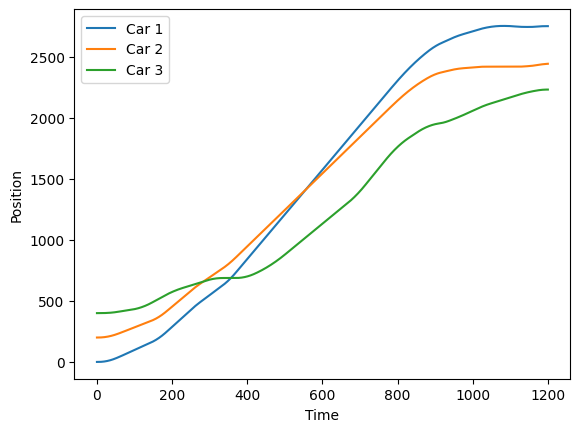

In [394]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, List

def get_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Reads data from a CSV file and returns it as arrays.

    Returns:
        A tuple containing four NumPy arrays: row_1, row_2, row_3, row_4.
    """
    file_path = 'verkeerssimulatie-rechteweg-snelheden.csv'
    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        rows = list(reader)

    # Extract data from rows
    row_1 = np.array([float(row[0]) for row in rows])
    row_2 = np.array([float(row[1]) for row in rows])
    row_3 = np.array([float(row[2]) for row in rows])
    row_4 = np.array([float(row[3]) for row in rows])

    return row_1, row_2, row_3, row_4

def plot_data(ys: np.ndarray, xss: List[np.ndarray], xrange: Tuple[int,int] = None, yrange: Tuple[int,int] = None):
    """
    Plots the data.

    Args:
        ys: The y-axis data.
        xss: The x-axis data for each line.
        xrange: Optional x-axis range as a tuple (xmin, xmax).
        yrange: Optional y-axis range as a tuple (ymin, ymax).
    """
    car_1 = bereken_posities(ys, xss[0])
    car_2 = bereken_posities(ys, xss[1])
    car_3 = bereken_posities(ys, xss[2])

    plt.plot(car_1, label='Car 1')
    plt.plot(car_2, label='Car 2')
    plt.plot(car_3, label='Car 3')

    if xrange:
        plt.xlim(xrange)
    if yrange:
        plt.ylim(yrange)

    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

def bereken_posities(times: np.ndarray, speeds: np.ndarray) -> np.ndarray:
    """
    Calculates positions based on times and speeds.

    Args:
        times: The time values.
        speeds: The speed values corresponding to each time.

    Returns:
        An array of position values.
    """
    positions = [speeds[0]]
    for i in range(len(times) - 1):
        speed = speeds[i + 1]
        last_position = positions[-1]
        new_position = last_position + (speed / 10)
        positions.append(new_position)
    return np.array(positions)

def vind_botsing(t: np.ndarray, car1: np.ndarray, car2: np.ndarray, car3: np.ndarray) -> Tuple[float, int, float, int, float]:
    """
    Finds the collision between cars and returns relevant information.

    Args:
        t: Array of time values.
        car1: Array of position values for car 1.
        car2: Array of position values for car 2.
        car3: Array of position values for car 3.

    Returns:
        A tuple containing information about the collision:
        - The time of collision
        - The number of the first car involved in the collision
        - The position of the first car at the time of collision
        - The number of the second car involved in the collision
        - The position of the second car at the time of collision

        If no collision is found, returns None.
    """
    for i in range(len(t) - 1):
        if (car1[i] <= car2[i] and car1[i + 1] >= car2[i + 1]) or (car1[i] >= car2[i] and car1[i + 1] <= car2[i + 1]):
            return t[i], 1, car1[i], 2, car2[i]

        if (car1[i] <= car3[i] and car1[i + 1] >= car3[i + 1]) or (car1[i] >= car3[i] and car1[i + 1] <= car3[i + 1]):
            return t[i], 1, car1[i], 3, car3[i]

        if (car2[i] <= car3[i] and car2[i + 1] >= car3[i + 1]) or (car2[i] >= car3[i] and car2[i + 1] <= car3[i + 1]):
            return t[i], 2, car2[i], 3, car3[i]

    return None

# Usage example
data = get_data()
ys = data[0]
xss = [data[1], data[2], data[3]]
plot_data(ys, xss)


In [395]:
ac_tests.test_verkeer_posities(get_data, bereken_posities, vind_botsing)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_time` | Controlleert de tijd van de botsing |
| `test_car_a` | Controlleert de identiteit van de eerste auto |
| `test_car_a_pos` | Controlleert de positie van de eerste auto |
| `test_car_b` | Controlleert de identiteit van de tweede auto |
| `test_car_b_pos` | Controlleert de positie van de tweede auto |

test_car_a (ac_tests.test_verkeer_posities.<locals>.TestVerkeerPosities.test_car_a) ... ok
test_car_a_pos (ac_tests.test_verkeer_posities.<locals>.TestVerkeerPosities.test_car_a_pos) ... FAIL
test_car_b (ac_tests.test_verkeer_posities.<locals>.TestVerkeerPosities.test_car_b) ... ok
test_car_b_pos (ac_tests.test_verkeer_posities.<locals>.TestVerkeerPosities.test_car_b_pos) ... FAIL
test_time (ac_tests.test_verkeer_posities.<locals>.TestVerkeerPosities.test_time) ... ok

FAIL: test_car_a_pos (ac_tests.test_verkeer_posities.<locals>.TestVerkeerPosities.test_car_a_pos)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\RLMKl\PycharmProjects\acOpdrachten\ac_tests.py", line 893, in test_car_a_pos
    np.testing.assert_almost_equal(self.cap, 657.4, 1)
  File "C:\Users\RLMKl\AppData\Local\Programs\Python\Python311\Lib\contextlib.py", line 81, in inner
    return func(*args, **kwds)
           ^^^^^^^^^^^^^^^^^^^
  File "C:

## Opdracht 9 (120p)
In deze opdracht gaan we nogmaals numeriek integreren, maar in dit geval hebben we geen data-bestand om in te lezen, maar krijgen we een functie mee en twee x-waarden waartussen we de integraal willen weten.
Om deze te berekenen gaan we een Riemann-som opstellen, waarbij je zelf mag kiezen welke variant je gebruikt **(wel moet je aangeven welke je gebruikt, en moet dit kloppen met je code)**. 

We kunnen de meegegeven functie `func` gebruiken om de data binnen de loop on-the-fly voor ons te genereren. Je mag er hierbij vanuit gaan dat `x1` links van `x2` ligt, dus dat je een loop kan maken die op `x1` begint en doorloopt tot `x2`. We hanteren als stapgrootte de meegegeven parameter `delta`.

Verder meegegeven een drietal functies waarmee je implementatie getest zal worden. `pi`[[graph](https://www.desmos.com/calculator/qxliatgfpc)] geeft, voor de integraal tussen $0$ en $1$ een benadering van $\pi$, `gauss`[[graph](https://www.desmos.com/calculator/r3qh9jjqqf)] is gerelateerd aand de de normaal-verdeling die jullie in blok B gezien hebben, en `bizarre` [[graph](https://www.desmos.com/calculator/8v8r4m0btq)] is een harige functie die we absoluut niet met de hand willen uitrekenen.

In [266]:
from typing import Callable

def get_integral_between(func: Callable[[float], float], x1: float, x2: float, delta: float = 0.0001) -> float:
    """
    Calculate the numerical approximation of the definite integral of a function
    between two limits using the trapezoidal rule.

    Args:
        func (Callable[[float], float]): The function for which to calculate the integral.
        x1 (float): The lower limit of integration.
        x2 (float): The upper limit of integration.
        delta (float, optional): The width of each interval in the trapezoidal rule.
            Smaller values result in a more accurate approximation. Defaults to 0.0001.

    Returns:
        float: The numerical approximation of the definite integral of the function
            between the given limits.
    """

    integral = 0.0
    while x1 < x2:
        integral += (func(x1) + func(x1 + delta)) * delta / 2.0
        x1 += delta
    return integral


In [267]:
def pi(self, x: float) -> float:
    return 4 / (1+x**2)
def gauss(self, x: float) -> float:
    return math.e **(-x**2)
def bizarre(x: float) -> float:
    return (math.sin(x)**2 / -math.cos(x**4)) + math.e**x
    
ac_tests.test_numeric_integral(get_integral_between)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_pi` | Zoekt de integraal van `pi` op $[0,1]$, dit zou $\pi$ moeten benaderen  |
| `test_gauss` | Zoekt de integraal van `gauss` op $[-100,100]$, dit zou $\sqrt\pi$ moeten benaderen |
| `test_bizarre` | Zoekt de integraal van `bizarre` voor de middelste heuvel, dit zou $1.86$ moeten benaderen |

test_bizarre (ac_tests.test_numeric_integral.<locals>.TestNumericIntegral.test_bizarre) ... ok
test_gauss (ac_tests.test_numeric_integral.<locals>.TestNumericIntegral.test_gauss) ... ok
test_pi (ac_tests.test_numeric_integral.<locals>.TestNumericIntegral.test_pi) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.039s

OK


### $\to$ Bekijk hier de theorie over de integraal van een polynoom

## Opdracht 10 (60p)
Programmeer de regel voor polynomen uit in Python. De polynomen werken hetzelfde als bij opdracht 3. Omdat we in dit geval vaak met een breuk te maken zullen krijgen, kan het zijn dat Python belachelijke dingen print zoals $\frac{6004799503160661}{18014398509481984}$ voor $\frac{1}{3}$. Om dit te voorkomen kun je een deling `x / y` opschrijven als `Fraction(x, y)`, maar dit is niet verplicht.

Tevens staan in het test-blok de gebruikte polynomen om ook zelf te kunnen debuggen als er iets misgaat.

In [231]:
from typing import Tuple

def get_integral(poly: Tuple[dict, str, str, int]) -> Tuple[dict, str, str, int]:
    """
    Calculate the integral of a polynomial.

    Args:
        poly (Tuple[dict, str, str, int]): A tuple representing the polynomial information.
            - poly[0]: A dictionary with the polynomial terms, where the keys are the powers
                       and the values are the coefficients.
            - poly[1]: The name of the function.
            - poly[2]: The variable of the function.
            - poly[3]: The number of times the function has been differentiated.

    Returns:
        Tuple[dict, str, str, int]: A tuple representing the integral of the polynomial.
            - The first element is a dictionary with the integral terms, where the keys are
              the powers and the values are the coefficients.
            - The second element is the name of the function.
            - The third element is the variable of the function.
            - The fourth element is the reduced number of differentiations.

    """
    terms, label, var, primes = poly
    integral = {}
    for power, coefficient in terms.items():
        new_power = power + 1
        new_coefficient = coefficient / new_power
        integral[new_power] = new_coefficient
    return integral, label, var, primes - 1


In [232]:
x_squared = polynomial({1: 0, 2: 1})
x_recip_sq = polynomial({1: 0, -2: 1})
x_root = polynomial({1/2: 1})

ac_tests.test_polynomial_integral(get_integral)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_squared` | Zoekt de integraal van `x_squared` ($x^2$) |
| `test_recip_sq` | Zoekt de integraal van `test_recip_sq` ($\frac{1}{x^2}$) |
| `test_root` | Zoekt de integraal van `x_root` ($\sqrt x$) |

test_recip_sq (ac_tests.test_polynomial_integral.<locals>.TestNumericIntegral.test_recip_sq) ... ok
test_root (ac_tests.test_polynomial_integral.<locals>.TestNumericIntegral.test_root) ... ok
test_squared (ac_tests.test_polynomial_integral.<locals>.TestNumericIntegral.test_squared) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


# Checkpoint Delta
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.